# Agenda
- What is Regression
- Types of Regression
  - Linear Regression
    - Simple Linear Regression
      - Train Test Split
    - Multiple Linear Regression
      - Overfitting and Underfitting
      - Bias and Variance Trade off
  - Non Linear Regression
    - Polynomial Regression
- Model Evaulation and Validation
  - Cross Validation Techniques
  - Performance Metrics in Regression
    - Mean Square Error (MSE)
    - Mean Absolute Error (MAE)
    - Root Mean Squared Error (RMSE)
    - R- Squared
- Regularization Techinques
  - Lasso Regression
  - Ridge Regressio

- Hyperparameter Tuning
  - GridSearch
  - RandomSearch
- Pipelines
  - scikitlearn pipelines

## What is Regression
Regression is a type of Supevised Learning and Statistical Method used to model and analyze the relationship between dependent variable(target/ output) and one or more independent variable( features/input) . The goal of regression to predict a continuous value for a given set of Inputs


## Types of Regression
There are two types for Linear Regression
- Simple Linear Regression
- Multiple Linear Regression

### Simple Linear Regression
Simple Linear Regression models the relationship between one indepenedent Variable and dependent variable as a straight line: which can be represented as 
$$ y = mx + c $$


# __Date: 02-07-2025__

In Other words, The Equation of line that is used to predict the values for the independent variable is represented as :
$$ \hat{y}= \beta_0 + \beta_1 x $$
Where:
- $\hat{y}$ is the predicted value of the dependent variable
- x is the independent variable
- $\beta_0$ is the intercept 
- $\beta_1$ is the slope with respest to variable `x`

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/Simple_linear_regression.jpg)


### Multiple Linear Regression
Multiple Linear Regression models the relationship between Two or more indepenedent Variable/features and dependent variable as a straight line: The Equation for multiple linear regression is represented as 
$$ \hat{y} =  \beta_0 + \beta_1 x_1 +  \beta_2 x_2 +....+ \beta_n x_n  $$

$$ \hat{y} =  \beta_0 + \sum_{i=1}^n\beta_i x_i $$

where :
- $x_1, x_2, ... ,x_n$ are the predictor variables/features
- $\beta_1,\beta_2...., \beta_n$  are the coefficient of each predictor(slope of each variable)

In [1]:
## Let us see how to fit a simple linear regression on dataset

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the dataset
df = pd.read_csv('tvmarketing.csv')
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
# general summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


There are no missing values in he dataset

## Train Test Split
It a fundamental technique in ML used to evaluate model performance. It involves dividing data set into 2 parts
- Training set -  use to train the model
- Testing set - Used to test how well the model generalizes to unseen data

## Split Ratios
- Train -80% and Test -20%  : General Practice
- Train -70% and Test -30%  : Use when more data is available
- Train -60% and Test -40%  : Very large datasets
- Train -90% and Test -10%  : when test isn't critical

In [5]:
## perform train test split on the dataset
from sklearn.model_selection import train_test_split

In [6]:
# Segregate Input Features and Target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)
print(X_train.index)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Index([ 79, 197,  38,  24, 122, 195,  29,  19, 143,  86,
       ...
       121, 199,  20, 188,  71, 106,  14,  92, 179, 102],
      dtype='int64', length=160)
(160, 1)
(40, 1)
(160,)
(40,)


In [8]:
## Let us train(fit) the model
### Import LinearRegression from scikitlearn
from sklearn.linear_model import LinearRegression

In [9]:
# Create an instance of LinearRegression Class
lin_reg  = LinearRegression()
lin_reg

LinearRegression()

In [10]:
## train the model
lin_reg.fit(X_train, y_train)
# at this step the model learns the relationship between the input and output and finds the trained 
# parameters (Coefficeint of Regresion and the intercept)

LinearRegression()

In [11]:
print(f'The Coefficient of Regression is : {lin_reg.coef_}')
print(f'The Intercept is : {lin_reg.intercept_}')

The Coefficient of Regression is : [0.04652973]
The Intercept is : 7.1196384305929525


In [12]:
print(f'The Equation of Prediction Line is {lin_reg.intercept_} + {lin_reg.coef_[0]} * TV')

The Equation of Prediction Line is 7.1196384305929525 + 0.04652973370544335 * TV


In [13]:
## Predict on the test set
y_test_predicted = lin_reg.predict(X_test) 

In [14]:
print(y_test_predicted[:5])
print(y_test.values[:5])

[14.71794394 16.2115484  20.74819743  7.66403631 17.37013877]
[16.9 22.4 21.4  7.3 24.7]


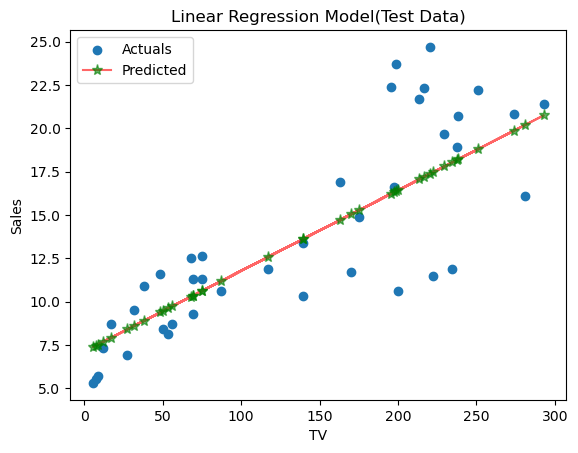

In [15]:
## Visualize the results for test dataset

plt.scatter(X_test,y_test, label = 'Actuals')
plt.plot(X_test, y_test_predicted, color = 'red', label = 'Predicted', marker =  '*',
         mfc = 'green', ms =8, mec='green', alpha = 0.6)
plt.legend(loc ='upper left')
plt.title('Linear Regression Model(Test Data)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

## Overfitting and Underfitting
When developing ML models, Achieving the right balance between model complexity and simplilicity is crucial. This balance is covered by the concepts of overfitting and underfitting

### Overfitting
- Overfitting Occurs when a model learns the noise and details too well to an extent that it negatvely impacts its performance on unseen data
- Sign: High Accuracy on training data but poor on test data
- Cause: Model is too complex(too many parameters)

### Underfitting
- Underfitting happens when a model is too simple to capture the underlying pattern of the data
- Sign: Poor Accuracy on training data &  test data
- Cause: Model is too simple(too few parameters)

### Bias and Variance Tradeoff
- Bias : Errors due to overly simplistics assumptions in the learning algorithm. High bias can cause underfitting
- Variance : Error due to excessive complexity in the learning algorithm.High Bias can cause overfitting

**Tradeoff**
- Low Bias and High Variance : Models fits the training data well but fails to generalize(overfitting)
- High Bias and Low Variance : Models does not fit the training data well and misses the underlying trend(undefitting)
- Optimal Tradeoff:  Finding the balance where the model performs well on both training and testing data minimizing overall error.


![link_text](https://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

** Image Courtesy: scott.fortmann-roe.com **

In [16]:
## Lets look how to check for ovrfitting and underfitting

In [17]:
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
y_train_predicted =  lin_reg.predict(X_train)
y_test_predicted =  lin_reg.predict(X_test)


mse_train =  mean_squared_error(y_train, y_train_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted)
r2_train = r2_score(y_train, y_train_predicted)
r2_test = r2_score(y_test, y_test_predicted)


print(f'Train MSE : {mse_train:.4f}')
print(f'Test MSE : {mse_test:.4f}')
print(f'Train R2 : {r2_train:.4f}')
print(f'Test R2 : {r2_test:.4f}')


Train MSE : 10.6036
Test MSE : 10.2047
Train R2 : 0.5912
Test R2 : 0.6767


# __Date: 03-07-2025__

In [19]:
# Check for overfitting and underfitting:

if mse_train < mse_test or r2_train > r2_test:
    if abs(r2_train - r2_test) > 0.1:
        print('Model may be overfitting to the training data')
    else:
        print('Model Performs reasonably well, but check slight overfitting')
elif mse_train > mse_test and r2_train < r2_test:
    print('Model may be underfitting, Consider increasing model complexity')
else:
    print(' Model has balanced fit on both training and testing data') 

Model may be underfitting, Consider increasing model complexity


Mean Squared Error (MSE) and R-squared (R²) values are calculated for both training and test datasets.
 - MSE measures the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual value.
 - R² provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model
 - Overfitting: The model performs well on the training data but poorly on the test data (higher R² on training or lower MSE on training compared to testing).
 - Underfitting: The model performs poorly on both training and test data, or better on the test data compared to the training data, which could suggest that the model is too simple.

# Non Linear Regression

## Polynomial Regression
Polynomial Regression is a subset of Linear Regression that includes Polynomial terms. The relationship between independent variable(X) and dependent variable (y) is modeled as $n_{th}$ degree polynomial
- It is special case of multiple linear regression. some polynomial terms are added to the multiple linear regression  equation to convert into polynomial regression.

## Steps 
- After Importing Libraries: assign the polynomial features of upto degree 5 to a variable poly_features
- Fit and transform values of X_train and X_test for polynomial Terms
- apply linear regression on new data


In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly_features = PolynomialFeatures(degree =5)
poly_features.fit(X_train)
X_train_poly =  poly_features.transform(X_train)
X_test_poly =  poly_features.transform(X_test)

In [22]:
pd.DataFrame(X_test_poly[:5])

,0,1,2,3,4,5
0,1.0,163.3,26666.89,4.354703e+06,7.111230e+08,1.161264e+11
1,1.0,195.4,38181.16,7.460599e+06,1.457801e+09,2.848543e+11
2,1.0,292.9,85790.41,2.512801e+07,7.359994e+09,2.155742e+12
3,1.0,11.7,136.89,1.601613e+03,1.873887e+04,2.192448e+05
4,1.0,220.3,48532.09,1.069162e+07,2.355364e+09,5.188866e+11


In [23]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly,y_train)

LinearRegression()

In [24]:
print(f'Coefficients of Regression {lin_reg_poly.coef_}')
print(f'Intercept is  {lin_reg_poly.intercept_}')

Coefficients of Regression [ 0.00000000e+00  2.80560519e-01 -4.16466213e-03  3.27228357e-05
 -1.16885598e-07  1.53706995e-10]
Intercept is  3.2031450517643645


In [25]:
# Do Predictions
y_train_pred_poly= lin_reg_poly.predict(X_train_poly)
y_test_pred_poly= lin_reg_poly.predict(X_test_poly)

In [26]:
mse_train =  mean_squared_error(y_train, y_train_pred_poly)
mse_test = mean_squared_error(y_test, y_test_pred_poly)
r2_train = r2_score(y_train, y_train_pred_poly)
r2_test = r2_score(y_test, y_test_pred_poly)


print(f'Train MSE : {mse_train:.4f}')
print(f'Test MSE : {mse_test:.4f}')
print(f'Train R2 : {r2_train:.4f}')
print(f'Test R2 : {r2_test:.4f}')


Train MSE : 10.0658
Test MSE : 10.2051
Train R2 : 0.6119
Test R2 : 0.6767


In [27]:

if mse_train < mse_test or r2_train > r2_test:
    if abs(r2_train - r2_test) > 0.1:
        print('Model may be overfitting to the training data')
    else:
        print('Model Performs reasonably well, but check slight overfitting')
elif mse_train > mse_test and r2_train < r2_test:
    print('Model may be underfitting, Consider increasing model complexity')
else:
    print(' Model has balanced fit on both training and testing data') 

Model Performs reasonably well, but check slight overfitting


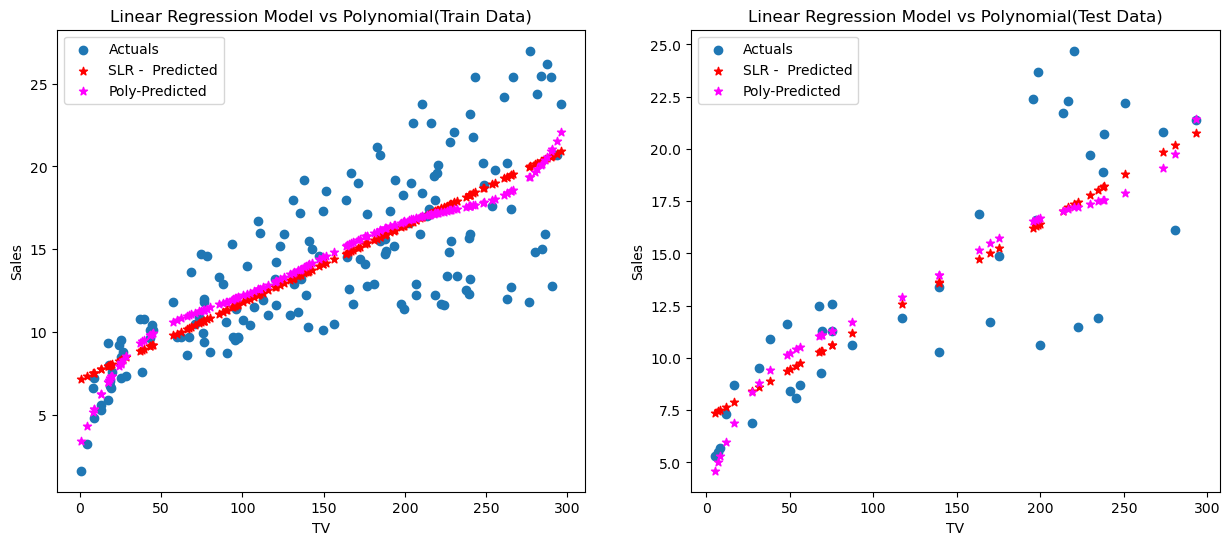

In [28]:
# Visualize the simple Linear and Polynomial Regression Results on both train and test data

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.scatter(X_train,y_train, label = 'Actuals')
plt.scatter(X_train, y_train_predicted, color = 'red', label = 'SLR -  Predicted', marker =  '*')

plt.scatter(X_train, y_train_pred_poly, color = 'magenta', label = 'Poly-Predicted', marker =  '*')

plt.legend(loc ='upper left')
plt.title('Linear Regression Model vs Polynomial(Train Data)')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1,2,2)
plt.scatter(X_test,y_test, label = 'Actuals')
plt.scatter(X_test, y_test_predicted, color = 'red', label = 'SLR -  Predicted', marker =  '*')

plt.scatter(X_test, y_test_pred_poly, color = 'magenta', label = 'Poly-Predicted', marker =  '*')

plt.legend(loc ='upper left')
plt.title('Linear Regression Model vs Polynomial(Test Data)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()


# Model Evaluation and Validation Techniques
## Performance Metrics
In Regression , Evaluation metrics gives the quantitative measures of models performance, which helps n assessing and selection of the model. The Key Metrics are:

## Mean Squared Error (MSE)
it calculates the average of squares of the errors, which is the difference between the actual values and the predicted values. A Lower value of MSE suggest a better model performance. Mathematically:

$$ MSE =  \frac{\sum_{i=1}^n {(y_{i} - \hat{y_i})}^2}{n}
$$
where,
$$
\hat{y_i} =  \beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}
$$
or We can rewrite :
$$
MSE =   \frac{\sum_{i=1}^n {(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))}^2}{n}
$$
where
- $n$ is the number of observations
- $p$ is the number of input features
- $x$ is input feature values
- $y$ is actual output
- $\hat{y}$ is predicted output
- $\beta_0$ is Intercept of best fit  line
- $\beta_j$ is Coefficient of Regression for the $j^{th}$ feature


## Root Mean Squared Error (RMSE)
RMSE is square root of MSE, providing measure of the average magnitude of the errors in the predicted values. Since the square root operation reverses the squaring operation MSE, RMSE ends up having same units as the original target variables. Mathematically

$$
RMSE =   \sqrt{\frac{\sum_{i=1}^n {(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))}^2}{n}}
$$
where
- $n$ is the number of observations
- $p$ is the number of input features
- $x$ is input feature values
- $y$ is actual output
- $\beta_0$ is Intercept of best fit line
- $\beta_j$ is Coefficient of Regression for the $j^{th}$ feature

## Mean Absolute Error

MAE calculates the average of the absolute errors between actual and predicted values. it is less sensitive  to outliers as compared MSE and RMSE, Mathematically

$$
MAE =   \frac{\sum_{i=1}^n |(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))|}{n}
$$


### R - Squared (R2)
R - Squared explains how much the variation of the dependent variable `y` can be attributed to changes in independent variable `x`. R Squared value ranges between (0-1)
- **0** - This indicates that the model explains none of the variance in the dependent variable. The independent variable has no explanatory powers for the changes in target variable
- **1** -  This represents a perfect fit. The model explains all of the variance in the dependent variable. The changes in `y` are perfectly captured by changes in `x`
While a higher R2 Score generally suggest that a model is a better fit, but it needs to be considered along with other metrics like MSE, RMSE or MAE
Mathematically.
$$
\text{R-Squared (r2 score)} =  1 - \frac{\text{RSS}}{\text{TSS}}
$$
where
$$
\text{RSS or SSR or Residual Sum of Squares} =  \sum_{i=1}^n {(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))}^2
$$
$$
\text{TSS or SST or Total Sum of Squares} =  \sum_{i=1}^n {(y_{i} - \overline{y})}^2
$$
where
- $n$ is the number of observations
- $p$ is the number of input features
- $x$ is input feature values
- $y$ is actual output
- $\hat{y}$ is predicted output
- $\overline{y}$ is mean of the target variable

# __Cross Validation Techniques__
Cross-validation is a machine learning technique that evaluates model performance on unseen data by dividing the data into multiple folds. In each iteration, one fold is used as a validation set and the remaining as training data. This process is repeated such that each fold serves as the validation set once. The results from all iterations are averaged to provide a robust estimate of model performance. Some of the common cross-validation techniques are:

**1. K-Fold Cross-Validation**

In K-Fold Cross validation, the dataset is divided into k equally sized folds. The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, with each fold used exactly once as the test set. The results are averaged to produce a single performance estimate.
* Pros: Provides a more accurate estimate of model performance.
* Cons: Computationally intensive for large datasets.

**2. Stratified K-Fold Cross-Validation**

Similar to K-Fold but ensures that each fold has the same proportion of different classes as the original dataset. This is especially useful for imbalanced datasets.
* Pros: More reliable performance estimates for imbalanced datasets.
* Cons: Still computationally intensive.

__Now let us build a regression model, perform analysis on it, and evaluate models performance__

In [29]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
# read the dataset
df =  pd.read_csv('housing_with_ocean_proximity.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [33]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


__Observations__
- The Data does follow near normal distribution, however is not standardized and hance requires standardzation
- Few Feature apparently have outliers, need to verify and treat outliers in the data

In [34]:
# Check for missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are 207 missing values in the total_bedrooms, which is approximately 1% of the total data size. Replace the missing value with the median.

In [35]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
df['total_bedrooms'].isnull().sum()

0

In [36]:
# Explore the categorical colum

df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [37]:
## Apply get_dummies of the dataframe  with prefix op and dtype int

df =  pd.get_dummies(df, prefix = 'op', dtype ='int')

In [38]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0


In [39]:
# Split the data into feature and target and divide in train test split 70:30 ratio

X =  df.drop(columns = ['median_house_value'])
y = df['median_house_value']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 42)

In [40]:
# Standardize the train and test features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc =  sc.fit_transform(X_train)
X_test_sc =  sc.transform(X_test)

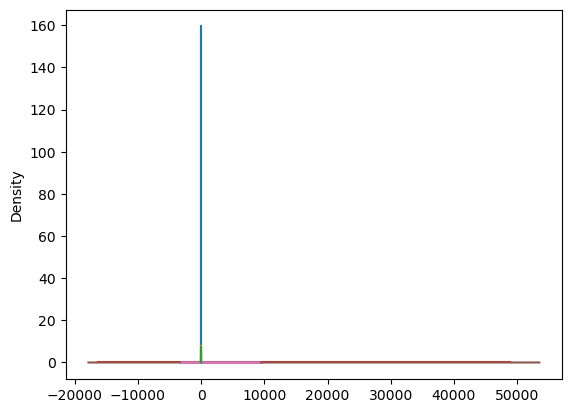

In [41]:
X_train.plot.kde(legend = False)
plt.show()

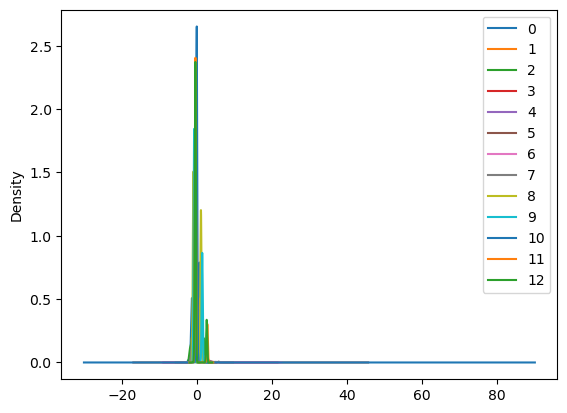

In [42]:
pd.DataFrame(X_train_sc).plot.kde()
plt.show()

In [43]:
# create KFold Validations
# n_splits -  number of folds to be created
# shuffle  - shuffles before splitting
# random_state - ensure reproducible shuffling

In [44]:
kf =  KFold(n_splits = 10, shuffle = True, random_state = 42)

In [45]:
## Initialize the model

model = LinearRegression()

In [46]:
## Implementing Cross Validation
k_fold_scores = cross_val_score(model, X_train_sc, y_train, scoring = 'r2', cv = kf)
print(k_fold_scores)
print(f'Average Validation R2 score is {k_fold_scores.mean():.4f}')


[0.63228793 0.66428419 0.6194598  0.61561585 0.63095253 0.62157025
 0.66318406 0.68723059 0.67706704 0.63049495]
Average Validation R2 score is 0.6442


In [47]:
## Evaluate the model on Test Data

model.fit(X_train_sc, y_train)
y_train_pred = model.predict(X_train_sc)
y_test_pred = model.predict(X_test_sc)

print(f'MSE Train : {mean_squared_error(y_train, y_train_pred)}')
print(f'MSE Test : {mean_squared_error(y_test, y_test_pred)}')
print('_'* 50)
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train, y_train_pred))}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test, y_test_pred))}')
print('_'* 50)
print(f'MAE Train : {mean_absolute_error(y_train, y_train_pred)}')
print(f'MAE Test : {mean_absolute_error(y_test, y_test_pred)}')
print('_'* 50)
print(f'R2 Score Train : {r2_score(y_train, y_train_pred)}')
print(f'R2 Score Test : {r2_score(y_test, y_test_pred)}')

MSE Train : 4728483441.955843
MSE Test : 4733529273.092554
__________________________________________________
RMSE Train : 68763.969067789
RMSE Test : 68800.64878395082
__________________________________________________
MAE Train : 49723.37021129251
MAE Test : 50078.098841565436
__________________________________________________
R2 Score Train : 0.6470480227253683
R2 Score Test : 0.6393611711434394


In [48]:
# Letus tabulate the coefficient of Regression for all features

pd.DataFrame(model.coef_, index =  X_train.columns, columns = ['Coef of Regression'])

,Coef of Regression
longitude,-53080.224842
latitude,-53211.371980
housing_median_age,13949.878189
total_rooms,-12701.718316
total_bedrooms,44378.886741
population,-42559.677787
households,16172.447264
median_income,74802.559190
op_<1H OCEAN,6754.070799
op_INLAND,-12812.067100


In [49]:
df.cov(numeric_only= True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
longitude,4.014139,-3.957054,-2.728244,1.948037e+02,5.807886e+01,2.263778e+02,4.236807e+01,-0.057765,-1.062743e+04,0.319571,-0.051828,0.000295,-0.298579,0.030541
latitude,-3.957054,4.562293,0.300346,-1.682178e+02,-5.955635e+01,-2.631378e+02,-5.801024e+01,-0.323860,-3.553256e+04,-0.474212,0.349139,-0.000551,0.240683,-0.115060
housing_median_age,-2.728244,0.300346,158.396260,-9.919120e+03,-1.683911e+03,-4.222271e+03,-1.457581e+03,-2.846140,1.533988e+05,0.283185,-1.386321,0.003334,1.008652,0.091150
total_rooms,194.803750,-168.217847,-9919.120060,4.759445e+06,8.482135e+05,2.117613e+06,7.661046e+05,820.852410,3.377289e+07,-3.284292,26.021079,-0.257077,-15.774866,-6.704844
total_bedrooms,58.078858,-59.556355,-1683.910513,8.482135e+05,1.758895e+05,4.148814e+05,1.562357e+05,-6.068896,2.393514e+06,3.742682,-1.202159,-0.028208,-2.590532,0.078217
population,226.377839,-263.137814,-4222.270582,2.117613e+06,4.148814e+05,1.282470e+06,3.928036e+05,10.400979,-3.221249e+06,41.969982,-10.928541,-0.183506,-21.653895,-9.204040
households,42.368072,-58.010245,-1457.581290,7.661046e+05,1.562357e+05,3.928036e+05,1.461760e+05,9.466667,2.904924e+06,8.058699,-7.012231,-0.054009,-1.212019,0.219562
median_income,-0.057765,-0.323860,-2.846140,8.208524e+02,-6.068896e+00,1.040098e+01,9.466667e+00,3.609323,1.508475e+05,0.159361,-0.210021,-0.000273,0.033532,0.017401
median_house_value,-10627.425205,-35532.559074,153398.801329,3.377289e+07,2.393514e+06,-3.221249e+06,2.904924e+06,150847.482793,1.331615e+10,14708.817710,-26043.526022,42.052469,5809.214268,5483.441574
op_<1H OCEAN,0.319571,-0.474212,0.283185,-3.284292e+00,3.742682e+00,4.196998e+01,8.058699e+00,0.159361,1.470882e+04,0.246721,-0.140496,-0.000107,-0.049113,-0.057005


# Regularization

In Linear Regression, Relgularization emcompasess a set of techniques used to address the issue of overfitting.

## Core Concept

Regularization Techniques achieve their objective by introducing a penalty term to the models objective function. The Objective function which is typically measured by MSE is minimized during the training process. The penalty term discourages the model from attaining excessive complexity by penalizing the size of the model's coefficients.

## Regularization Term or `alpha`

This is hyperparameter that scales the penalty term. It controls the strength of Regularization
- Higher `alpha` - imposes a strong penalty on the coefficients, leads to greater regularization. This tends to produce a simpler model that may underfit
- Lower `alpha` - imposes a Weaker penalty on the coefficients, leads to less restricted regularization, potentially capturing more details in the data but at the risk of overfitting.

Common Techniques used for regularization are
- Lasso Regression (L1 Regularization)
- Ridge Regression (L2 Regularization)

# Least Absolute Shrinkage and Selection Operator (LASSO) Regression
It relies upon the linear regression but additionaly performs so called L1 Regularization, which is a process in which it introduces additional information to curb overfitting.
- It performs variable selection
- it forces some of the coefficients to be exactly zero with the help large `alpha`
- it reduces the learning of more complex model and may address the overfitting issue.
- it decrease the variance of the model without an increase in bias.
Mathematically,
 - In Regression the objective function is **Residual Sum of Squares** given as
$$
\text{RSS}  =  \sum_{i=1}^n {(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))}^2
$$


The Lasso regression penalizes the coefficents by the sum of absolute coefficient controlled by `alpha` and modifies teh objective function as :
$$
 \sum_{i=1}^n {(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))}^2 + \alpha \sum_{j=1}^{p}|\beta_{j}|
$$
where $\alpha$ can take various values:
- $\alpha = 0$ : Same coefficients as least squares linear regression
- $\alpha = \infty$ : all coefficients are zero
- $0< \alpha < \infty $ : Coefficients are between 0 and that of least squares linear regression

## Ridge Regression
**Ridge Regression** also known as L2 Regularization is a regularization technique used in linear regression to prevent overfitting. It is useful for handling multicollinear data, where two predictors/independent variables are highly correlated to each other.
*Collinearity* refers to a situation where two or more predictor variables in a multiple regression model are highly correlated, meaning they have a linear relationship. This correlation makes it difficult to determine the individual effect of each predictor on the target variable, leading to unreliable and unstable estimates of regression coefficients.
Ridge regression adds a regularization term to the loss function that penalizes large coefficients in the model and encourages the model to have smaller coefficients.
It results in a simpler and more generalized model.

Ridge Regression does shrink the coefficients, it does not force them to zero, meaning it does not perform feature selection
Mathematically
$$
 \sum_{i=1}^n {(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))}^2 + \alpha \sum_{j=1}^{p}{\beta_{j}}^2
$$

## __Date: 08-07-2025__

In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('hitters.csv')

In [52]:
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [53]:
## Drop Unnamed: 0 column
df  = df.drop(columns =['Unnamed: 0'])

In [54]:
# general summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [55]:
print(f'In the Column Salary {(322-263)/322 *100:.2f}% values are missing')

In the Column Salary 18.32% values are missing


In [56]:
print(df['League'].unique())
print(df['Division'].unique())
print(df['NewLeague'].unique())

['A' 'N']
['E' 'W']
['A' 'N']


In [57]:
## Check for missing values
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

There are 59 missing values in Salary column which is the target variable. Since the data size is small (only 322 sample) and out of that approx 18% of the data in target variable is misssing.
- acquire more data
- fill the missing values with appropriate metric

In [58]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [59]:
## Filling the missing Values - Replacing with median as the salary column may have outliers
df['Salary'] =  df['Salary'].fillna(df['Salary'].median())

In [60]:
df.isnull().sum().sum()

0

In [61]:
## Converting categorical variables to numeric using get_dummies
df =  pd.get_dummies(df, drop_first = True, dtype = 'int')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    int64  
 1   Hits         322 non-null    int64  
 2   HmRun        322 non-null    int64  
 3   Runs         322 non-null    int64  
 4   RBI          322 non-null    int64  
 5   Walks        322 non-null    int64  
 6   Years        322 non-null    int64  
 7   CAtBat       322 non-null    int64  
 8   CHits        322 non-null    int64  
 9   CHmRun       322 non-null    int64  
 10  CRuns        322 non-null    int64  
 11  CRBI         322 non-null    int64  
 12  CWalks       322 non-null    int64  
 13  PutOuts      322 non-null    int64  
 14  Assists      322 non-null    int64  
 15  Errors       322 non-null    int64  
 16  Salary       322 non-null    float64
 17  League_N     322 non-null    int32  
 18  Division_W   322 non-null    int32  
 19  NewLeagu

In [63]:
## Seperate Feature and Target and perform Train test Split with 20% test size
X = df.drop(columns = ['Salary'])
y = df['Salary']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size =  0.2, random_state = 42)
X_train.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,379.408560,100.089494,10.836576,50.688716,47.579767,38.902724,7.354086,2608.284047,705.361868,69.097276,353.642023,323.867704,257.937743,295.793774,103.626459,8.093385,0.459144,0.509728,0.459144
std,154.389373,46.256289,8.634310,25.622645,26.654665,21.277424,4.946107,2348.254437,660.386468,86.303981,338.897806,329.746609,271.112011,288.398759,133.100234,6.412195,0.499300,0.500881,0.499300
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244.000000,61.000000,4.000000,31.000000,27.000000,22.000000,3.000000,711.000000,185.000000,12.000000,93.000000,80.000000,62.000000,110.000000,8.000000,3.000000,0.000000,0.000000,0.000000
50%,374.000000,96.000000,8.000000,47.000000,43.000000,35.000000,6.000000,1897.000000,491.000000,38.000000,246.000000,219.000000,174.000000,212.000000,40.000000,6.000000,0.000000,1.000000,0.000000
75%,517.000000,139.000000,16.000000,70.000000,63.000000,53.000000,11.000000,3859.000000,1000.000000,90.000000,513.000000,430.000000,326.000000,326.000000,150.000000,12.000000,1.000000,1.000000,1.000000
max,680.000000,223.000000,40.000000,119.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,1.000000,1.000000,1.000000


In [64]:
import seaborn as sns

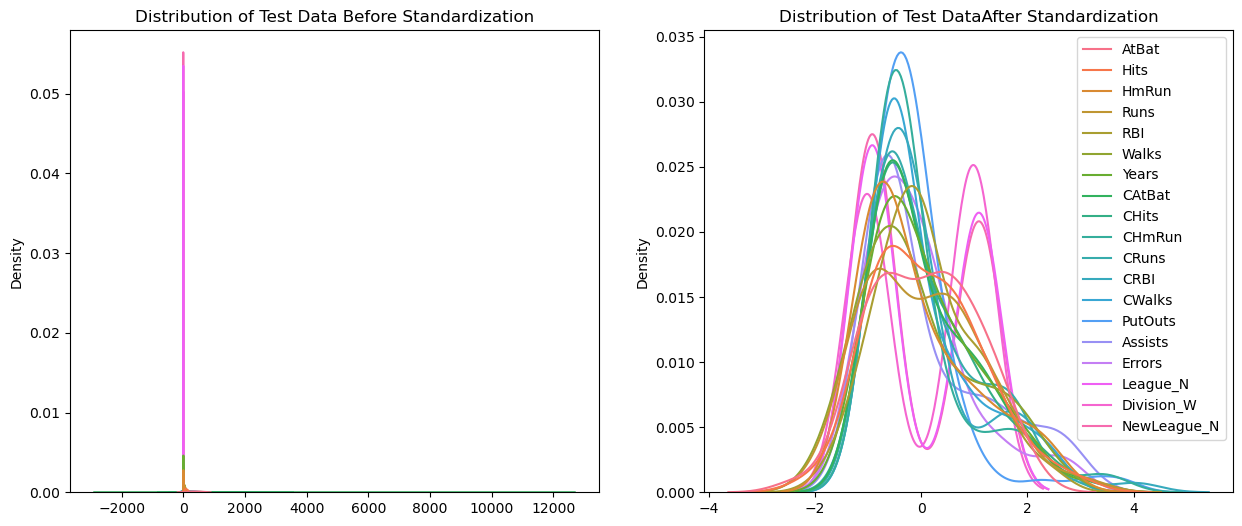

In [65]:
## Apply Standard Scaling to bring data  to standard Normal Form
from sklearn.preprocessing import StandardScaler

sc =  StandardScaler()
X_train_sc =  sc.fit_transform(X_train)
X_test_sc =  sc.transform(X_test)

plt.figure(figsize =  (15, 6))
plt.subplot(1,2,1)
plt.title('Distribution of Test Data Before Standardization')
sns.kdeplot(X_test, legend = False)

plt.subplot(1,2,2)
plt.title('Distribution of Test DataAfter Standardization')
sns.kdeplot(pd.DataFrame(X_test_sc, columns = X_train.columns),legend = True)
plt.show()

In [66]:
## Apply linear Regression and notice coefficients of Regression

from sklearn.linear_model import LinearRegression


In [67]:
## Instantiating and training the model
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [68]:
# view the coef of Regression
lr.coef_

array([-284.12800876,  260.81856928,   55.297243  ,  -20.06729801,
        -48.12984173,  114.625592  ,  -39.98848825, -589.88134003,
        451.06680534,  -11.19454525,  278.57793759,  283.13096492,
       -200.5523143 ,   45.48027296,   46.02670753,  -19.2913814 ,
         28.21657212,  -50.66011791,  -14.74243837])

In [69]:
## Create DataFrame for coef of regression for each predictor to comapare later with Lasso Coef's
coef_df =  pd.DataFrame(lr.coef_, index = X_train.columns, columns = ['Coef Before Lasso'])
coef_df 

,Coef Before Lasso
AtBat,-284.128009
Hits,260.818569
HmRun,55.297243
Runs,-20.067298
RBI,-48.129842
Walks,114.625592
Years,-39.988488
CAtBat,-589.881340
CHits,451.066805
CHmRun,-11.194545


In [70]:
## Applying Lasso Model
lasso = Lasso(alpha = 1, max_iter = 10000)
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1, max_iter=10000)

In [71]:
coef_df['Coef After Lasso'] =  lasso.coef_

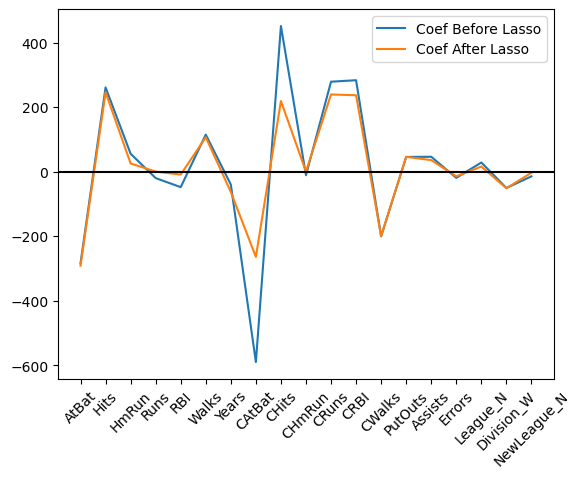

In [72]:
plt.plot(coef_df)
plt.legend(['Coef Before Lasso','Coef After Lasso'])
plt.xticks(rotation =  45)
plt.axhline(y=0, color ='black')
plt.show()

In [73]:
coef_df

,Coef Before Lasso,Coef After Lasso
AtBat,-284.128009,-291.366408
Hits,260.818569,245.787153
HmRun,55.297243,25.313438
Runs,-20.067298,-0.000000
RBI,-48.129842,-9.168132
Walks,114.625592,106.494342
Years,-39.988488,-63.099938
CAtBat,-589.881340,-264.071124
CHits,451.066805,218.699586
CHmRun,-11.194545,0.000000


In [74]:
print(lr.intercept_)
print(lasso.intercept_)

506.93387937743194
506.93387937743194


**Observation**
* Lasso Intercept: 506.93
This is the intercept term of your Lasso regression model. It represents the expected mean value of the dependent variable when all independent variables are set to zero. In practical terms, it's the baseline prediction when no other information (from the variables) is provided.
Lasso Coefficients:
* Lasso coefficients: represent the relationship between each independent variable and the dependent variable.
Each coefficient estimates the change in the dependent variable for a one unit change in the respective independent variable, holding all other variables constant.
    - A positive coefficient indicates that as the independent variable increases, the dependent variable also increases.
    - A negative coefficient indicates that as the independent variable increases, the dependent variable decreases.
    - The magnitude of the coefficient shows the strength of the impact. A larger absolute value indicates a stronger effect.

In [75]:
## Evaluate the model on Test Data


y_train_pred_lr = lr.predict(X_train_sc)
y_test_pred_lr = lr.predict(X_test_sc)
y_train_pred_lasso = lasso.predict(X_train_sc)
y_test_pred_lasso = lasso.predict(X_test_sc)

print(f'MSE Train Linear Regression: {mean_squared_error(y_train, y_train_pred_lr)}')
print(f'MSE Test Linear Regression : {mean_squared_error(y_test, y_test_pred_lr)}')
print(f'MSE Train Lasso Regression : {mean_squared_error(y_train, y_train_pred_lasso)}')
print(f'MSE Test Lasso Regression: {mean_squared_error(y_test, y_test_pred_lasso)}')
print('_'* 50)

print(f'R2 Train Linear Regression: {r2_score(y_train, y_train_pred_lr)}')
print(f'R2 Test Linear Regression : {r2_score(y_test, y_test_pred_lr)}')
print(f'R2 Train Lasso Regression : {r2_score(y_train, y_train_pred_lasso)}')
print(f'R2 Test Lasso Regression: {r2_score(y_test, y_test_pred_lasso)}')

MSE Train Linear Regression: 83794.0772432239
MSE Test Linear Regression : 129139.98578201624
MSE Train Lasso Regression : 84535.99452626547
MSE Test Lasso Regression: 123657.38172429847
__________________________________________________
R2 Train Linear Regression: 0.4788938784584589
R2 Test Linear Regression : 0.32797323686701396
R2 Train Lasso Regression : 0.4742799767294832
R2 Test Lasso Regression: 0.3565039559633215


In [76]:
# Lets implement Ridge

In [77]:
ridge = Ridge(alpha = 1, max_iter = 10000)
ridge.fit(X_train_sc, y_train)

Ridge(alpha=1, max_iter=10000)

In [78]:
coef_df['Coef After Ridge'] =  ridge.coef_

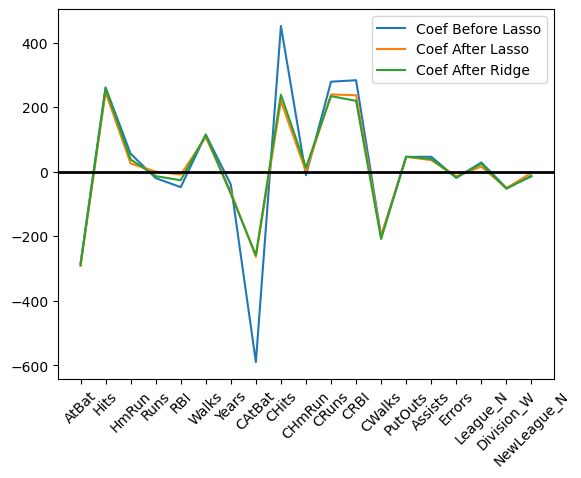

In [79]:
plt.plot(coef_df)
plt.legend(['Coef Before Lasso','Coef After Lasso', 'Coef After Ridge'])
plt.xticks(rotation =  45)
plt.axhline(y=0, color ='black', linewidth = 2)
plt.show()

In [80]:
coef_df

,Coef Before Lasso,Coef After Lasso,Coef After Ridge
AtBat,-284.128009,-291.366408,-290.529087
Hits,260.818569,245.787153,258.331468
HmRun,55.297243,25.313438,37.888387
Runs,-20.067298,-0.000000,-13.951942
RBI,-48.129842,-9.168132,-26.793621
Walks,114.625592,106.494342,113.655528
Years,-39.988488,-63.099938,-69.171850
CAtBat,-589.881340,-264.071124,-258.592811
CHits,451.066805,218.699586,238.302639
CHmRun,-11.194545,0.000000,12.637956


In [81]:
print(lr.intercept_)
print(lasso.intercept_)
print(ridge.intercept_)

506.93387937743194
506.93387937743194
506.93387937743194


In [82]:
## Evaluate the model on Test Data

y_train_pred_lr = lr.predict(X_train_sc)
y_test_pred_lr = lr.predict(X_test_sc)
y_train_pred_lasso = lasso.predict(X_train_sc)
y_test_pred_lasso = lasso.predict(X_test_sc)
y_train_pred_ridge = ridge.predict(X_train_sc)
y_test_pred_ridge = ridge.predict(X_test_sc)

print(f'MSE Train Linear Regression: {mean_squared_error(y_train, y_train_pred_lr)}')
print(f'MSE Test Linear Regression : {mean_squared_error(y_test, y_test_pred_lr)}')
print(f'MSE Train Lasso Regression : {mean_squared_error(y_train, y_train_pred_lasso)}')
print(f'MSE Test Lasso Regression: {mean_squared_error(y_test, y_test_pred_lasso)}')
print(f'MSE Train Ridge Regression : {mean_squared_error(y_train, y_train_pred_ridge)}')
print(f'MSE Test Ridge Regression: {mean_squared_error(y_test, y_test_pred_ridge)}')
print('_'* 50)

print(f'R2 Train Linear Regression: {r2_score(y_train, y_train_pred_lr)}')
print(f'R2 Test Linear Regression : {r2_score(y_test, y_test_pred_lr)}')
print(f'R2 Train Lasso Regression : {r2_score(y_train, y_train_pred_lasso)}')
print(f'R2 Test Lasso Regression: {r2_score(y_test, y_test_pred_lasso)}')
print(f'R2 Train Ridge Regression : {r2_score(y_train, y_train_pred_ridge)}')
print(f'R2 Test Ridge Regression: {r2_score(y_test, y_test_pred_ridge)}')

MSE Train Linear Regression: 83794.0772432239
MSE Test Linear Regression : 129139.98578201624
MSE Train Lasso Regression : 84535.99452626547
MSE Test Lasso Regression: 123657.38172429847
MSE Train Ridge Regression : 84406.01899619859
MSE Test Ridge Regression: 124475.8089486714
__________________________________________________
R2 Train Linear Regression: 0.4788938784584589
R2 Test Linear Regression : 0.32797323686701396
R2 Train Lasso Regression : 0.4742799767294832
R2 Test Lasso Regression: 0.3565039559633215
R2 Train Ridge Regression : 0.4750882802110271
R2 Test Ridge Regression: 0.35224497300676727


# __Date: 09-07-2025__

### Ridge And Lasso Cross Validation Models
sklearn offers the CV models for both Lasso and Ridge Regression namely LassoCV and RidgeCV. These Models allows us to find out the optimal values for the parameters of base algorithm Lasso or Ridge.

In [83]:
from sklearn.linear_model import RidgeCV , LassoCV

LassoCV(*, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=None, positive=False, random_state=None, selection='cyclic')

RidgeCV(alphas=(0.1, 1.0, 10.0), *, fit_intercept=True, scoring=None, cv=None, gcv_mode=None, store_cv_results=None, alpha_per_target=False, store_cv_values='deprecated')

In [99]:
lasso_cv =  LassoCV(alphas =  np.arange(1,25), cv = 5, max_iter = 1000000)
ridge_cv =  RidgeCV(alphas =  np.arange(1,25), cv = 5)

In [100]:
lasso_cv.fit(X_train_sc, y_train)

LassoCV(alphas=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
        cv=5, max_iter=1000000)

In [101]:
ridge_cv.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
        cv=5)

In [102]:
##  Find The Best Alpha value chosen from the random set 
print(f'best Alpha Value Through Lasso {lasso_cv.alpha_}')
print(f'best Alpha Value Through Ridge {ridge_cv.alpha_}')

best Alpha Value Through Lasso 2
best Alpha Value Through Ridge 1


In [104]:
## Evaluate the model on Test Data

y_train_pred_lr = lr.predict(X_train_sc)
y_test_pred_lr = lr.predict(X_test_sc)
y_train_pred_lasso = lasso.predict(X_train_sc)
y_test_pred_lasso = lasso.predict(X_test_sc)
y_train_pred_ridge = ridge.predict(X_train_sc)
y_test_pred_ridge = ridge.predict(X_test_sc)
y_train_pred_lasso_cv = lasso_cv.predict(X_train_sc)
y_test_pred_lasso_cv = lasso_cv.predict(X_test_sc)
y_train_pred_ridge_cv = ridge_cv.predict(X_train_sc)
y_test_pred_ridge_cv = ridge_cv.predict(X_test_sc)


print(f'MSE Train Linear Regression: {mean_squared_error(y_train, y_train_pred_lr)}')
print(f'MSE Test Linear Regression : {mean_squared_error(y_test, y_test_pred_lr)}')
print(f'MSE Train Lasso Regression : {mean_squared_error(y_train, y_train_pred_lasso)}')
print(f'MSE Test Lasso Regression: {mean_squared_error(y_test, y_test_pred_lasso)}')
print(f'MSE Train Ridge Regression : {mean_squared_error(y_train, y_train_pred_ridge)}')
print(f'MSE Test Ridge Regression: {mean_squared_error(y_test, y_test_pred_ridge)}')
print(f'MSE Train Lasso CV Regression : {mean_squared_error(y_train, y_train_pred_lasso_cv)}')
print(f'MSE Test Lasso CV Regression: {mean_squared_error(y_test, y_test_pred_lasso_cv)}')
print(f'MSE Train Ridge CV Regression : {mean_squared_error(y_train, y_train_pred_ridge_cv)}')
print(f'MSE Test Ridge CV Regression: {mean_squared_error(y_test, y_test_pred_ridge_cv)}')
print('_'* 50)

print(f'R2 Train Linear Regression: {r2_score(y_train, y_train_pred_lr):.4f}')
print(f'R2 Test Linear Regression : {r2_score(y_test, y_test_pred_lr):.4f}')
print(f'R2 Train Lasso Regression : {r2_score(y_train, y_train_pred_lasso):.4f}')
print(f'R2 Test Lasso Regression: {r2_score(y_test, y_test_pred_lasso):.4f}')
print(f'R2 Train Ridge Regression : {r2_score(y_train, y_train_pred_ridge):.4f}')
print(f'R2 Test Ridge Regression: {r2_score(y_test, y_test_pred_ridge):.4f}')
print(f'R2 Train Lasso CV Regression : {r2_score(y_train, y_train_pred_lasso_cv):.4f}')
print(f'R2 Test  Lasso CV Regression: {r2_score(y_test, y_test_pred_lasso_cv):.4f}')
print(f'R2 Train Ridge CV Regression : {r2_score(y_train, y_train_pred_ridge_cv):.4f}')
print(f'R2 Test  Ridge CV Regression: {r2_score(y_test, y_test_pred_ridge_cv):.4f}')

MSE Train Linear Regression: 83794.0772432239
MSE Test Linear Regression : 129139.98578201624
MSE Train Lasso Regression : 84535.99452626547
MSE Test Lasso Regression: 123657.38172429847
MSE Train Ridge Regression : 84406.01899619859
MSE Test Ridge Regression: 124475.8089486714
MSE Train Lasso CV Regression : 86082.37699961037
MSE Test Lasso CV Regression: 121016.85268153553
MSE Train Ridge CV Regression : 84406.01899619859
MSE Test Ridge CV Regression: 124475.8089486714
__________________________________________________
R2 Train Linear Regression: 0.4789
R2 Test Linear Regression : 0.3280
R2 Train Lasso Regression : 0.4743
R2 Test Lasso Regression: 0.3565
R2 Train Ridge Regression : 0.4751
R2 Test Ridge Regression: 0.3522
R2 Train Lasso CV Regression : 0.4647
R2 Test  Lasso CV Regression: 0.3702
R2 Train Ridge CV Regression : 0.4751
R2 Test  Ridge CV Regression: 0.3522


## Model Optimization
## HyperParameter Tuning
While training a model uses certain parameters which are set before the actual training of the  model.  These parameters are called hyperparameters of the model & finding the optimal value for hyperparameters such that model performance is best is hyperparameter tuning.<br>
The common techniques that are used for hyperparameter tuning are
- **GridSearch**
  - It systematically works through multiple combinations of hyperparmeters. it performs exhaustive search on defined parameter grid
  - **How it Works**
    - Define a parameter grid
    - Combination Evaluation
    - Model Training
    - Optimal Parameters
- **RandomSearch**
  - it explores the hyperparameters space by sampling fixed number of parameter settings from the specified distributions.
 - **How it Works**
    - Define a parameter grid
    - Random Sampling of hyperparameters
    - Model Training
    - Optimal Parameters

In [106]:
# Implement Grid Search with Cross Validation
from sklearn.model_selection import GridSearchCV, KFold

In [119]:
kf  = KFold(n_splits = 10, shuffle = True, random_state = 42)
param_grid  = {'alpha':np.arange(1,15,1), 
               }

model = Ridge()

In [120]:
search =  GridSearchCV(model, param_grid, scoring = 'r2', cv = kf)

In [121]:
search.fit(X_train_sc, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='r2')

In [122]:
print(f'Best Ridge Parameters : {search.best_params_}')
print(f'Best Ridge Score : {search.best_score_}')

Best Ridge Parameters : {'alpha': 14}
Best Ridge Score : 0.29908986481104133


In [124]:
print(search.cv_results_)

{'mean_fit_time': array([0.0042027 , 0.00461366, 0.00243223, 0.0022419 , 0.00230927,
       0.00110083, 0.00210207, 0.00174127, 0.00162747, 0.00126295,
       0.00185881, 0.00139658, 0.00130241, 0.00121541]), 'std_fit_time': array([0.00134337, 0.00270056, 0.00049096, 0.00075812, 0.00046147,
       0.00058137, 0.00061851, 0.00042613, 0.00078759, 0.00037256,
       0.00050966, 0.00056532, 0.00045947, 0.0002628 ]), 'mean_score_time': array([0.00244985, 0.00286939, 0.00156198, 0.00157394, 0.0016115 ,
       0.00131323, 0.00102506, 0.00110421, 0.00129538, 0.00103707,
       0.00125539, 0.00110323, 0.00085418, 0.00100484]), 'std_score_time': array([0.00111213, 0.00074828, 0.0005846 , 0.00078689, 0.00062423,
       0.00051969, 0.0006985 , 0.00083363, 0.00037444, 0.0006321 ,
       0.00040558, 0.00020066, 0.00039097, 0.00038922]), 'param_alpha': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
             mask=[False, False, False, False, False, False, False, False,
        

In [125]:
## sklearn Pipelines

Pipelines provide an organized approach to managing the data preprocessing and modelling code.  they combine the preprocessing and modelling steps into single streamlined process.
- Cleaner Code
- Fewer Bugs
- Easier to productionize
### Important point to remember
- A pipeline is sequence of data transformers that can include a final predictor.
- it allows o apply multiple preprocessing steps to the data and optionally end with a predictor for modelling
- Each intermediate step in the pipeline must have a fit and transform methods, while the final step only needs a fit
- The hyperparameters for any step can be set by using its name followed a double underscore `__` and the parameter name.

In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [128]:
df =  pd.read_csv('housing_with_ocean_proximity.csv')

In [129]:
## Seperate Features and Target and Do Train Test Split
X =  df.drop(columns= ['median_house_value'])
y = df['median_house_value']


X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size =0.3, random_state=42)

In [130]:
print(X_train.info())
print(X_train.isnull().sum())
print(X_train.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 7061 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14448 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB
None
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64
          longitude      latitude  housing_median_age   total_rooms  

In [133]:
X_train.select_dtypes(exclude = 'object').columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [134]:
cat_col =  X_train.select_dtypes(include = 'object').columns
num_col =  X_train.select_dtypes(exclude = 'object').columns

In [135]:
print(cat_col)
print(num_col)

Index(['ocean_proximity'], dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')


In [136]:
## Lets us create a pipeline for data transformation in numerical Columns

num_pipeline = Pipeline([
    ('impute_num', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])

## Lets us create a pipeline for data transformation in categorical Columns

cat_pipeline = Pipeline([
    ('impute_cat', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder())
])

In [138]:
## Unify the data preprocessing using column transformer

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_col), 
    ('cat', cat_pipeline, cat_col)
]) 

In [139]:
model =Ridge()

In [140]:
# Create Final Pipeline to train and Predict

final_pipeline =  Pipeline([
    ('pre', preprocessing),
    ('model_ridge', model)
])

In [141]:
X_train.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7061,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312,<1H OCEAN


In [142]:
## using GridSearchCV
grid = {'model_ridge__alpha':np.arange(0.1, 2.1, 0.1)}
search  =  GridSearchCV(final_pipeline, grid, scoring ='r2', cv = 5)
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder())]),
                                                                         Index(['ocean_proximity'], dtype='object'))])),
                                       ('model_ridge', Ridge())]),
             param_grid={'model_ridge__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])},
             scoring='r2')

In [143]:
print(f'Best_parameters :{search.best_params_}')
print(f'Best_Score :{search.best_score_}')

Best_parameters :{'model_ridge__alpha': 0.1}
Best_Score :0.6442576257316366


In [144]:
# Predict on Test Set

In [145]:
y_test_pred =  search.predict(X_test)
y_train_pred =  search.predict(X_train)
print(f'R2 score Train data {r2_score(y_train,y_train_pred): .3f}')
print(f'R2 score Test data {r2_score(y_test,y_test_pred): .3f}')
print(f'MSE Test data {mean_squared_error(y_test,y_test_pred): .3f}')
print(f'RMSE Test data {np.sqrt(mean_squared_error(y_test,y_test_pred)): .3f}')
print(f'MAE Test data {mean_absolute_error(y_test,y_test_pred): .3f}')

R2 score Train data  0.647
R2 score Test data  0.639
MSE Test data  4733468882.056
RMSE Test data  68800.210
MAE Test data  50078.770


In [152]:
rawinput =  X_train.sample()

In [153]:
rawinput

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6939,-118.1,33.99,36.0,1529.0,290.0,1271.0,287.0,3.6875,<1H OCEAN


In [154]:
rawinput['population'] =  np.nan

In [155]:
rawinput

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6939,-118.1,33.99,36.0,1529.0,290.0,NaN,287.0,3.6875,<1H OCEAN


In [157]:
print(f'The Median House Value for the given info is {search.predict(rawinput)[0]:.3f}')

The Median House Value for the given info is 203893.586
